# Data explore Notebook

In this notebook, I am going to explore the dataset to get to know it better and to extract the information I need to build a weather predicting ML Model

But to get started analyzing the dataset, let's import the needed libraries. You can install them using the ```REQUIREMENTS.txt``` file in the GitHub Repository this notebook is located in.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

## Introduction

The dataset we are going to use for the project is a weather dataset found on kaggle.com on the 13th February 2021. You can find the dataset following [this link](https://www.kaggle.com/selfishgene/historical-hourly-weather-data).

The data the dataset contains was collected between 2012 and 2017 and includes hourly weather data from 30 cities in the United States and Canada. Also the dataset includes the data from 6 cities in Israel.

The data the dataset includes are listed down here now:
* humidity
* pressure
* temperature
* wind_direction
* wind_speed
* weather_describtion
* city_attributes

All the different attributes are stored in multiple csv files, which are located inside the folder ./weather_data

In the model, we are first focusing on predicting the temperature, by letting the model learn, which temperature it should expect for a given date, meaning that we will feed in the date as our feature and hopefully get a temperature value (label) in return. Later on, I might try to expand this project to incorparate more components that are necessary to predict the weather, but that will be seen by time (I will update this page when the rest of the project is changing).


## Importing the files

So now it is time for us to open up the csv dataset using pandas DataFrames and display them in a table like form. Displaying it in this notebook in a table like form and plotting the data makes it easier to read than the comma seperated csv text files with thousands and thousands of lines of data. Also we won't display the complete dataset in a table, because the files have so many entries.


In [2]:
path = "./weather_data/"

humidity_raw = pd.read_csv(path + 'humidity.csv', index_col = 0)
pressure_raw = pd.read_csv(path + 'pressure.csv', index_col = 0)
temperature_raw = pd.read_csv(path + 'temperature.csv', index_col = 0)
wind_direction_raw = pd.read_csv(path + 'wind_direction.csv', index_col = 0)
wind_speed_raw = pd.read_csv(path + 'wind_speed.csv', index_col = 0)
weather_description_raw = pd.read_csv(path + 'weather_description.csv', index_col = 0)
city_attributes_raw = pd.read_csv(path + 'city_attributes.csv', index_col = 0)

In [3]:
cities = city_attributes_raw.index.values

cities[0]

'Vancouver'

## Splitting the data and preprocess it

Each file we imported now, includes all the data for all the cities. But it would make our live easier if we split them up to a dictionary which includes one pandas DataFrame for each city so we can call them using the ```cityname``` key of our dictionary.

Also we will drop all rows that still include N/A data, so data that is not readable, usable or just not measured during the recording of the dataset. So we remove them using the *dropna* method of pandas. Doing this we will make sure that our model will not throw an error during training do to unknown file type.

In [39]:
humidity = {}
pressure = {}
temperature = {}
wind_direction = {}
wind_speed = {}
weather_description = {}
city_attributes = {}

for i, city in enumerate(cities):
    humidity[city] = humidity_raw[city].dropna()
    pressure[city] = pressure_raw[city].dropna()
    temperature[city] = temperature_raw[city].dropna()
    wind_direction[city] = wind_direction_raw[city].dropna()
    wind_speed[city] = wind_speed_raw[city].dropna()
    weather_description[city] = weather_description_raw[city].dropna()
    city_attributes[city] = city_attributes_raw.iloc[i].dropna()

## Plotting the data

To explore the dataset even more, we will use seaborn and matplotlib.pyplot to plot the datagraphs onto this notebook. The helps to get a better view at the data and helps to get a small idea of what the data looks like and which model we might have to use to predict the temperature. Also we are going to limit the amount of data first so we wont plot all ~ 42'000 datapoints, because the output will not be usable. We will just use the data of one month which is equals to around 740 hours.

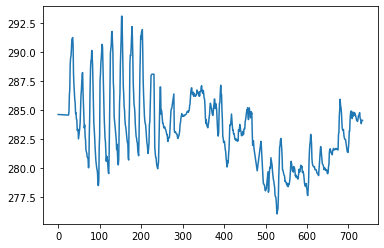

In [35]:
temps = temperature[cities[0]][:735]
x = [i for i in range(len(temps))]

plt.plot(x, temps)
plt.show()

In [42]:
dates = temperature[cities[0]].index.values

weather_dataset = {}

for i, temp in enumerate(temperature):
    weather_df = pd.DataFrame()